In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt

In [2]:
class LinearRegression1:
  def __init__(self, batch_size=32, max_epochs=100, patience =3, learning_rate = .001):
      self.batch_size = batch_size
      self.max_epochs = max_epochs
      self.patience = patience
      self.learning_rate = learning_rate
      self.loss_per_cycle = []
      self.weights, self.bias = None, None
      self.weights_without_Regularization = None
  
  def fit(self, X, y, batch_size =32, max_epochs = 100, patience = 3, learning_rate = .001):
      self.batch_size = batch_size
      self.max_epochs = max_epochs
      self.patience = patience
      self.learning_rate = learning_rate
      # Taking the input samples and features for creating the weight and bias matrix
      n_s, d_f, m_o = X.shape[0], X.shape[1], y.shape[1]

      # Initializing the weight and bias matrix to set the starting point of the optimization algorithm
      self.weights, self.bias = np.random.randn(d_f, m_o)*.05, np.random.randn(1, m_o)

      # Spliting the training data into train and validation set with 90 percent for training and 10% for validation
      batch_limit = int(0.9 * n_s)
      X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1)

      # Assigning the best parameters into variable for comapring it with the updated values while optimizing
      b_w, b_b, b_l, patience_count = self.weights, self.bias, float("inf"), 0

      # Gradient Descent
      for epoch in range(max_epochs):
        count = 0 # To track the no of loss that occurs within a single batch
        loss_per_batch = 0 # Initializing the loss to be zero so that after each iteration the values will be zero.
        for i in range(0, batch_limit, batch_size):

          # Selecting a mini-batch of data from the training set for use in the optimization process.
          # loss_per_batch = 0 # Initializing the loss to be zero so that after each iteration the values will be zero.
          X_batch = X_train[i:i + batch_size]
          y_batch = y_train[i:i + batch_size]

          # Pre+diction and finding the loss
          y_pred = X_batch.dot(self.weights) + self.bias
          loss = np.mean((y_batch-y_pred)** 2)

          loss_per_batch += loss # Adding up the loss within the batch
          count += 1 # To take average of the loss within one batch
          
          # calculating the gradients of the cost function with respect the weights and the bias.
          dw = (2 / batch_size) * (X_batch.T).dot(y_pred - y_batch) 
          db = (2 / batch_size) * np.sum(y_pred - y_batch)

          # Updating weights and bias
          self.weights -= learning_rate * dw
          self.bias -= learning_rate * db

        # Appending the averaged loss of each batch to a list for visualization purpose
        self.loss_per_cycle.append(loss_per_batch / count)

        # Predicting values for the target values with the best values of the weights
        y_pred = X_val.dot(self.weights) + self.bias

        # Calculates the MSE of on the validation set values
        val_loss = np.mean((y_val - y_pred)** 2)

        if val_loss < b_l: # Comparing validation loss with the best loss so far
          b_w, b_b, b_l, patience_count = self.weights, self.bias, val_loss, 0
        else:
          patience_count +=1
          if patience_count >= patience: # Checking if the patience count becomes equal to or more than the desired patience count training gets stopped.
            break
      b_w == self.weights
      b_b == self.bias
      self.weights_without_Regularization = b_w # Saving best weights 

  # Predict method to predict X_test
  def predict(self, X):
    y_pred = X.dot(self.weights) + self.bias
    return y_pred

  # The score method to determine the MSE of the model
  def score(self, X, y):
    y_pred = self.predict(X)
    MSE = np.mean((y-y_pred)**2)
    return MSE

  # Root Mean Square error Method
  def RMSE(self, y_predicted, y):
    return math.sqrt(np.mean((y_predicted - y) ** 2))

In [3]:
class L2Regularization(LinearRegression1):

  # Initializing the old attributes of the parent class and initializing the new attributes.
  def __init__(self, batch_size=32, max_epochs=100, patience=3, learning_rate=.001, regularization = .001):
    super().__init__(batch_size, max_epochs, patience, learning_rate)
    self.regularization = regularization
    self.weights_with_Regularization = None
    self.loss_per_cycle_with_R = []

  # Function with regularization parameter
  def fit_with_R(self, X, y, batch_size = 32, max_epochs =100, patience = 3, learning_rate = .001, regularization =.001):
    self.regularization = regularization
    self.weights_with_Regularization = None
    self.loss_per_cycle_with_R = []

    # Taking the input samples and features for creating the weight and bias matrix
    n_s, d_f, m_o = X.shape[0], X.shape[1], y.shape[1]

    # Initializing the weight and bias matrix to set the starting point of the optimization algorithm
    self.weights, self.bias = np.random.randn(d_f, m_o)*.05, np.random.randn(1, m_o)

    # Initializing the weight and bias matrix to set the starting point of the optimization algorithm
    batch_limit = int(0.9 * n_s)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1)

    # Initializing the weight and bias matrix to set the starting point of the optimization algorithm
    b_w, b_b, b_l, patience_count = self.weights, self.bias, float("inf"), 0

    # Gradient descent with Regularization file
    for epoch in range(max_epochs):
      count = 0 # Initializing the weight and bias matrix to set the starting point of the optimization algorithm
      loss_per_batch = 0 # Initializing the loss to be zero so that after each iteration the values will be zero.

      for i in range(0, batch_limit, batch_size):

        # Selecting a mini-batch of data from the training set for use in the optimization process.
        # loss_per_batch = 0 # Initializing the loss to be zero so that after each iteration the values will be zero.
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]

        # Pre+diction and finding the loss
        y_pred = X_batch.dot(self.weights) + self.bias

        # Regularization val
        regularization_val = (self.regularization / 2 * batch_size) * np.sum(np.square(self.weights))
        
        # loss with Regularization
        loss = np.mean((y_batch - y_pred)**2) + regularization_val
        loss_per_batch += loss
        count += 1 # To take average of the loss within one batch

        # calculating the gradients of the cost function with respect the weights and the bias.
        dw = (2 / batch_size) * (X_batch.T).dot(y_pred-y_batch) + (self.regularization * self.weights)
        db = (2 / batch_size) * np.sum(y_pred - y_batch)

        # Updating weights and bias
        self.weights -= learning_rate * dw
        self.bias -= learning_rate * db
      
      # calculating the gradients of the cost function with respect the weights and the bias.
      self.loss_per_cycle_with_R.append(loss_per_batch / count)

      # Predicting values for the target values with the best values of the weights
      y_pred = X_val.dot(self.weights) + self.bias

       # Calculates the MSE of on the validation set values
      val_loss = np.mean((y_val - y_pred)** 2)

      if val_loss <= b_l:  # Calculates the MSE of on the validation set values
        b_w, b_b, b_l, patience_count = self.weights, self.bias, val_loss, 0
      else:
        patience_count +=1
        if patience_count >= patience:   # Checking if the patience count becomes equal to or more than the desired patience count training gets stopped.
          break
    b_w == self.weights
    b_b == self.bias
    self.weights_with_Regularization = b_w # Saving best weights 

In [4]:
# Loading the iris dataset.
iris = datasets.load_iris()
"""
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
"""

'\n1. sepal length in cm\n2. sepal width in cm\n3. petal length in cm\n4. petal width in cm\n'

In [5]:
# Visualization of the model without regularization
def plot_without_R(model, X, y, title, color):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 9, stratify = iris.target)
  lr = model
  lr.fit(X_train,y_train)
  lr.predict(X_test)
  score = lr.score(X_test,X_test)
  Loss_list = lr.loss_per_cycle
  X_p = np.arange(len(Loss_list))
  y_p = Loss_list
  plt.figure(figsize = (10,6))
  plt.plot(X_p, y_p, lw = 3, c = color)
  plt.title( title, size = 14)
  plt.xlabel('No of iterations', size=14)
  plt.ylabel('Average loss per batch', size=14)
  plt.show()
  print("Weights = ", lr.weights_without_Regularization)
  print(f"MSE = {score}")

In [6]:
# Visualization of the model with regularization
def plot_with_R(model, X, y, title, color):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=9, stratify = iris.target)
  lr = model
  lr.fit_with_R(X_train,y_train)
  lr.predict(X_test)
  score = lr.score(X_test,X_test)
  Loss_list = lr.loss_per_cycle_with_R
  X_p = np.arange(len(Loss_list))
  y_p = Loss_list
  plt.figure(figsize = (10,6))
  plt.plot(X_p, y_p, lw = 3, c = color)
  plt.title( title, size = 18)
  plt.xlabel('No of iterations', size=14)
  plt.ylabel('Average loss per batch', size=14)
  plt.show()
  print("Weights", lr.weights_with_Regularization)
  print(f"MSE = {score}")

### sepal length, sepal width, petal length vs petal width

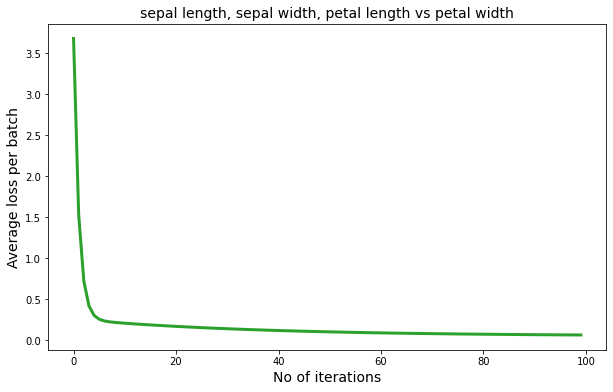

Weights =  [[ 0.08231418]
 [-0.00679198]
 [ 0.31420759]]
MSE = 11.54621554833296


In [7]:
# 1st Combination is sepal length, sepal width, petal length as independent features and petal width as the target.
X1, y1 = iris.data[:, [0, 1, 2]], iris.data[:, [3]]
plot_without_R(LinearRegression1(), X1, y1, "sepal length, sepal width, petal length vs petal width", '#2ca02c')

### sepal length, sepal width, petal width vs petal length

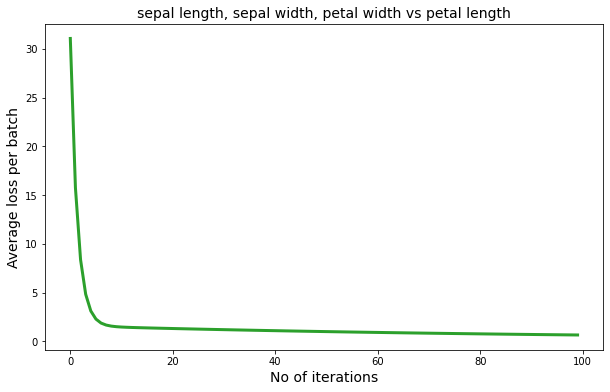

Weights =  [[0.84724509]
 [0.01179409]
 [0.55759745]]
MSE = 4.638981106543673


In [8]:
# 2nd Combination is sepal length, sepal width, petal width as independent features and petal length as the target.
X2, y2 = iris.data[:, [0, 1, 3]], iris.data[:, [2]]
plot_without_R(LinearRegression1(), X2, y2, "sepal length, sepal width, petal width vs petal length", '#2ca02c')

### sepal length, petal length, petal width vs sepal width

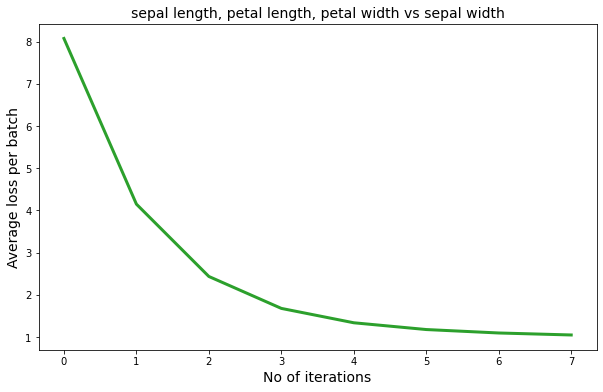

Weights =  [[0.46863354]
 [0.15996462]
 [0.10647239]]
MSE = 4.772891194749017


In [9]:
# 3rd Combination is sepal length, petal length, petal width as independent features and sepal width as the target.
X3, y3 = iris.data[:, [0, 2, 3]], iris.data[:, [1]]
plot_without_R(LinearRegression1(), X3, y3, "sepal length, petal length, petal width vs sepal width", '#2ca02c')

### sepal width, petal length, petal width vs sepal length

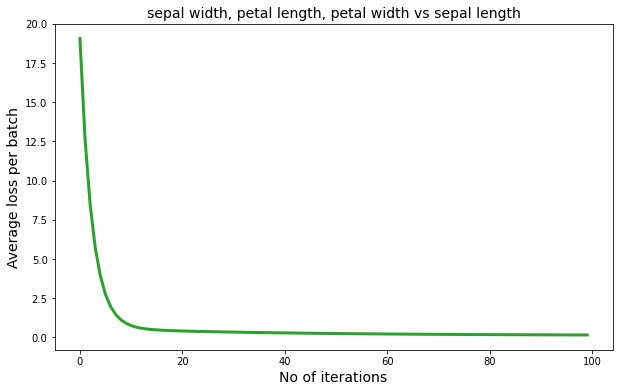

Weights =  [[0.79772961]
 [0.5514851 ]
 [0.11269261]]
MSE = 11.566997979260886


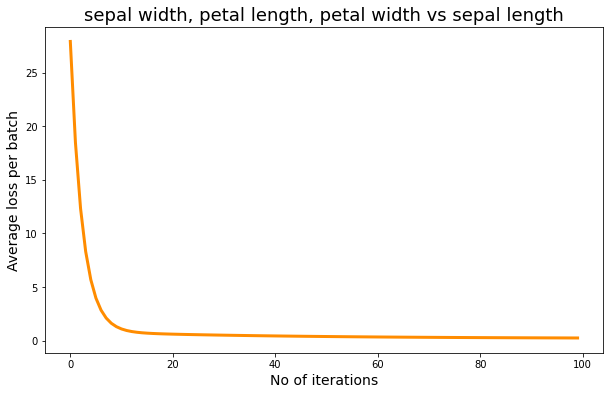

Weights [[0.98700893]
 [0.61394834]
 [0.10291917]]
MSE = 11.597526673565827


In [10]:
# 4th Combination is sepal width, petal length, petal width as independent features and sepal length as the target.
X4, y4 = iris.data[:, [1, 2, 3]], iris.data[:, [0]]
plot_without_R(LinearRegression1(), X4, y4, "sepal width, petal length, petal width vs sepal length", '#2ca02c')
plot_with_R(L2Regularization(), X4, y4, "sepal width, petal length, petal width vs sepal length", 'darkorange')

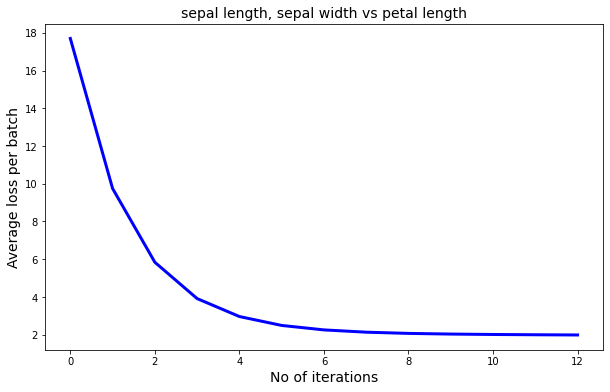

Weights =  [[0.56953443]
 [0.11846559]]
MSE = 2.6449023493970136


In [11]:
# 2 Feature combinations of Input and 1 Target
X1, y1 = iris.data[:, [0, 1]], iris.data[:, [2]]
plot_without_R(LinearRegression1(), X1, y1, "sepal length, sepal width vs petal length", 'blue')

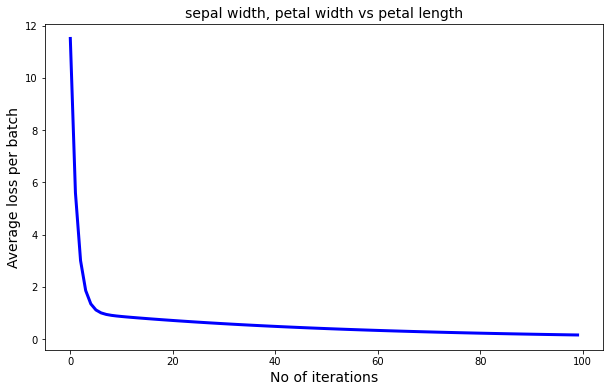

Weights =  [[0.08915734]
 [0.74852026]]
MSE = 2.613443198091329


In [12]:
# 2 Feature combinations of Input and 1 Target
X1, y1 = iris.data[:, [0, 2]], iris.data[:, [2]]
plot_without_R(LinearRegression1(), X1, y1, "sepal width, petal width vs petal length", 'blue')

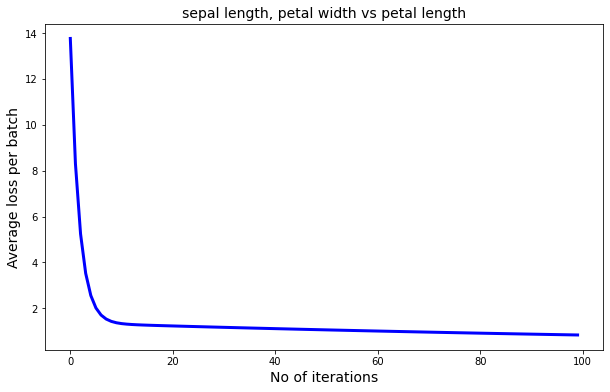

Weights =  [[0.60105147]
 [0.63010562]]
MSE = 5.772730229904171


In [13]:
# 2 Feature combinations of Input and 1 Target
X1, y1 = iris.data[:, [0, 3]], iris.data[:, [2]]
plot_without_R(LinearRegression1(), X1, y1, "sepal length, petal width vs petal length", 'blue')

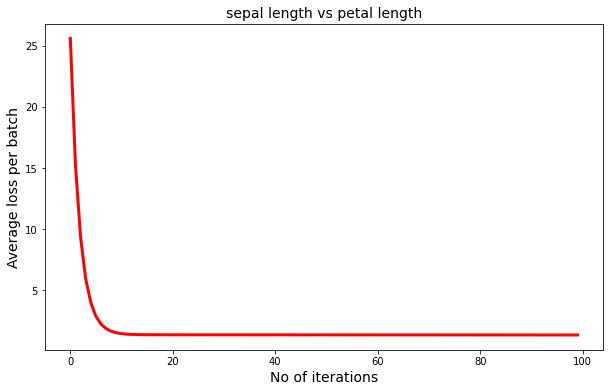

Weights =  [[0.88982379]]
MSE = 4.007447073585689


In [14]:
X1, y1 = iris.data[:, [0]], iris.data[:, [2]]
plot_without_R(LinearRegression1(), X1, y1, "sepal length vs petal length", 'red')

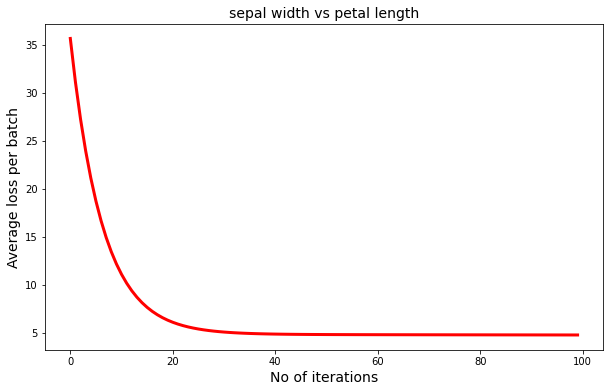

Weights =  [[1.57522059]]
MSE = 0.3586736001447221


In [15]:
X1, y1 = iris.data[:, [1]], iris.data[:, [2]]
plot_without_R(LinearRegression1(), X1, y1, "sepal width vs petal length", 'red')

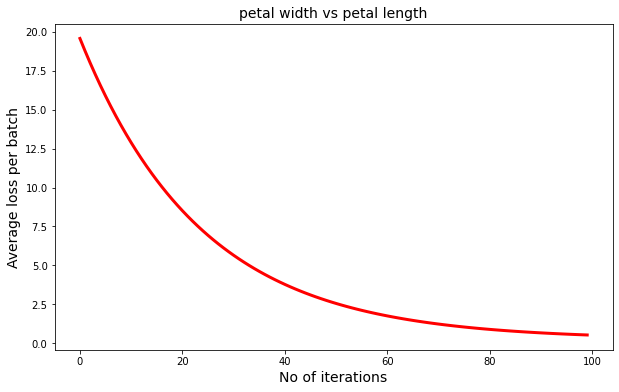

Weights =  [[1.89696946]]
MSE = 5.0678594007961575


In [16]:
X1, y1 = iris.data[:, [3]], iris.data[:, [2]]
plot_without_R(LinearRegression1(), X1, y1, "petal width vs petal length", 'red')

## Regression with multiple Output

In [17]:
import scipy.io as sio
from sklearn.linear_model import LinearRegression

data_path = "/content/drive/MyDrive/traffic_dataset.mat"

# The provided data is given in a `.mat` file.
# We can load it using the `scipy.io.loadmat` function.
mat = sio.loadmat(data_path)
input_train = mat['tra_X_tr']
output_train = mat['tra_Y_tr'].T
input_test = mat['tra_X_te']
output_test = mat['tra_Y_te'].T
adj_mat = mat['tra_adj_mat']

input_train = input_train.squeeze()
input_test = input_test.squeeze()

# Convert the sparse matrix to a dense matrix
data = []
test_data = []

for i in range(input_train.shape[0]):
    data.append(input_train[i].todense())

for i in range(input_test.shape[0]):
    test_data.append(input_test[i].todense())

# Convert the data to a numpy array
data = np.array(data)
test_data = np.array(test_data)

print(data.shape)
print(output_train.shape)

(1261, 36, 48)
(1261, 36)


In [18]:
# Reshaping the data splitted into 2D array.
input_train = np.reshape(data, (1261, -1))
output_train = np.reshape(output_train, (1261, -1))
input_test = np.reshape(test_data, (840, -1))
output_test = np.reshape(output_test, (840, -1))

In [19]:
l1 = LinearRegression1(batch_size = 15, max_epochs = 1000, patience = 90, learning_rate = .0001)
l1.fit(input_train, output_train)
pred = l1.predict(input_test)
print("Root Mean Square Error =", l1.RMSE(pred, output_test))

Root Mean Square Error = 0.06513021444050693


In [20]:
l1 = L2Regularization(batch_size = 15, max_epochs = 1000, patience = 90, learning_rate = .0001, regularization = .001)
l1.fit_with_R(input_train, output_train)
pred = l1.predict(input_test)
print("Root Mean Square Error =", l1.RMSE(pred, output_test))

Root Mean Square Error = 0.06715177358600116


## Choosing the value for Regularization

In [21]:
RMSE = []
for i in [0.5, 0.1, 0.01, 0.001, 0.0001]:
  l1 = L2Regularization(batch_size = 15, max_epochs = 1500, patience = 80, learning_rate = .001, regularization = i)
  l1.fit_with_R(input_train, output_train)
  pred = l1.predict(input_test)
  RMSE.append(l1.RMSE(pred, output_test))
print(RMSE)

[0.06266903796192497, 0.06140213925001579, 0.06416117765154232, 0.06449311021287106, 0.06590675245083748]


## Spatial Auto-regressive Dependence Interpretable Learning (SADIL) for traffic flow forecasting

In [22]:
adj_mat

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [23]:
# Extracting the spatial and temporal variables
spatial_vars = input_train[:, :-48]
temporal_vars = input_train[:,: -48]

In [24]:
# Computing the spatial dependence term using the adjacency matrix
# spatial_d = np.dot(spatial_vars, adj_mat)

In [25]:
# Combine the spatial variables and spatial dependence term
# feature = np.hstack((spatial_vars, spatial_d))

In [26]:
# Train a linear regression model on the combined features
# lr = LinearRegression1()
# lr.fit(feature, temporal_vars)

In [27]:
# Making predictions on the test data
# test_spatial_vars = input_test[:, :-48]
# test_spatial_dep = np.dot(test_spatial_vars, adj_mat)
# test_features = np.hstack((test_spatial_vars, test_spatial_dep))
# pred = lr.predict(test_features)
# print("Root Mean Square Error =", l1.rmse(pred, output_test))